In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
data['Positively Rated'] = np.where(data['Rating'] > 3, 1, 0)

In [4]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Positively Rated
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


In [5]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Positively Rated
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936,0.775270
std,203.298980,12.279544,1.110031,0.382216,5.702202,0.417413
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
Positively Rated           23486 non-null int64
dtypes: int64(6), object(5)
memory usage: 2.2+ MB


In [7]:
data['Positively Rated'].mean()

0.7752703738397343

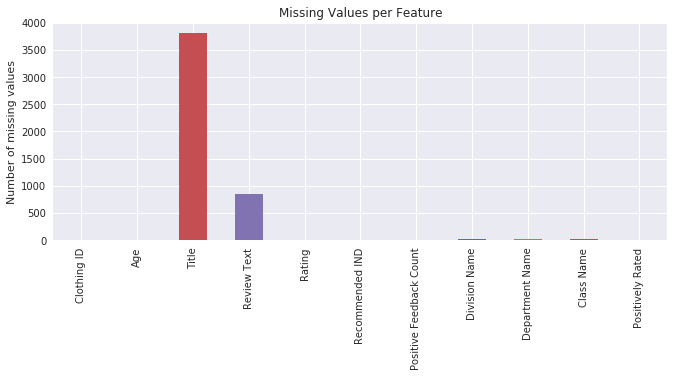

In [8]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(data).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');

# EDA

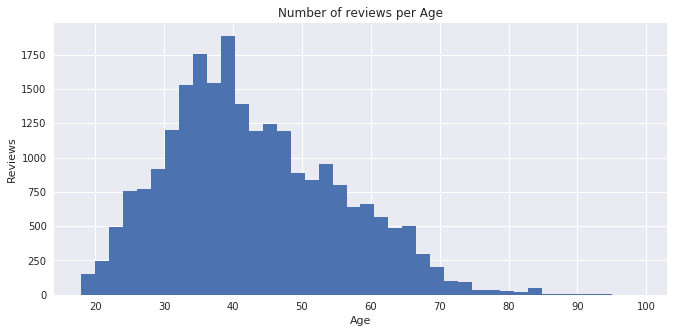

In [9]:
# Lets see the age distribution first
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(data.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

We can say that, age group 25-50 is the most revieving age group (target :))

Now, let's have a look at the distribution of ratings per age.

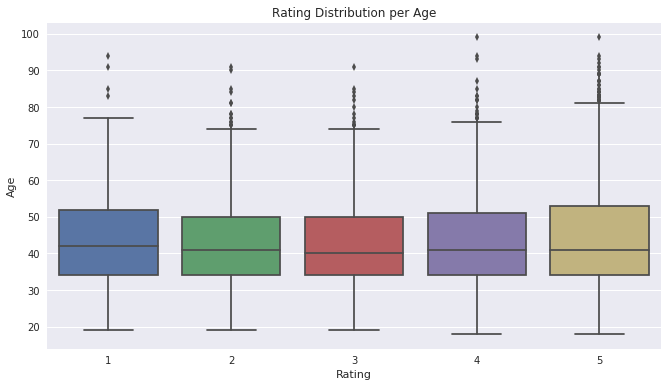

In [10]:
sns.set(rc={'figure.figsize':(11,6)})
sns.boxplot(x = 'Rating', y = 'Age', data = data)
plt.title('Rating Distribution per Age');

It looks like upper/lower quartiles and medians are pretty much close to each other, which means rating scores are not mainly related with the age. Or we can't say that, the young is more happy.
And pls note this is not the distribution of rating scores. It's coming next.

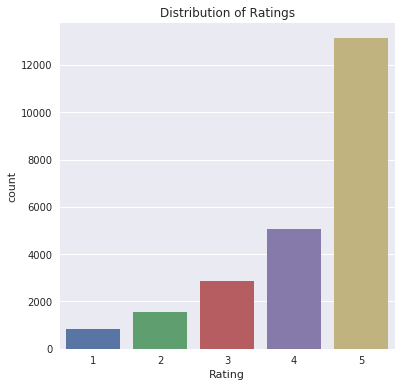

In [11]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Ratings')
sns.countplot(x = 'Rating', data = data);

Rating scores are showing a general satisfaction but of course companies need to work more to make it better.

On the other hand, data looks like imbalanced but I believe we have enough data to make succesfull predictions.

Now let's have a look at the distributions of Division/Department/Class

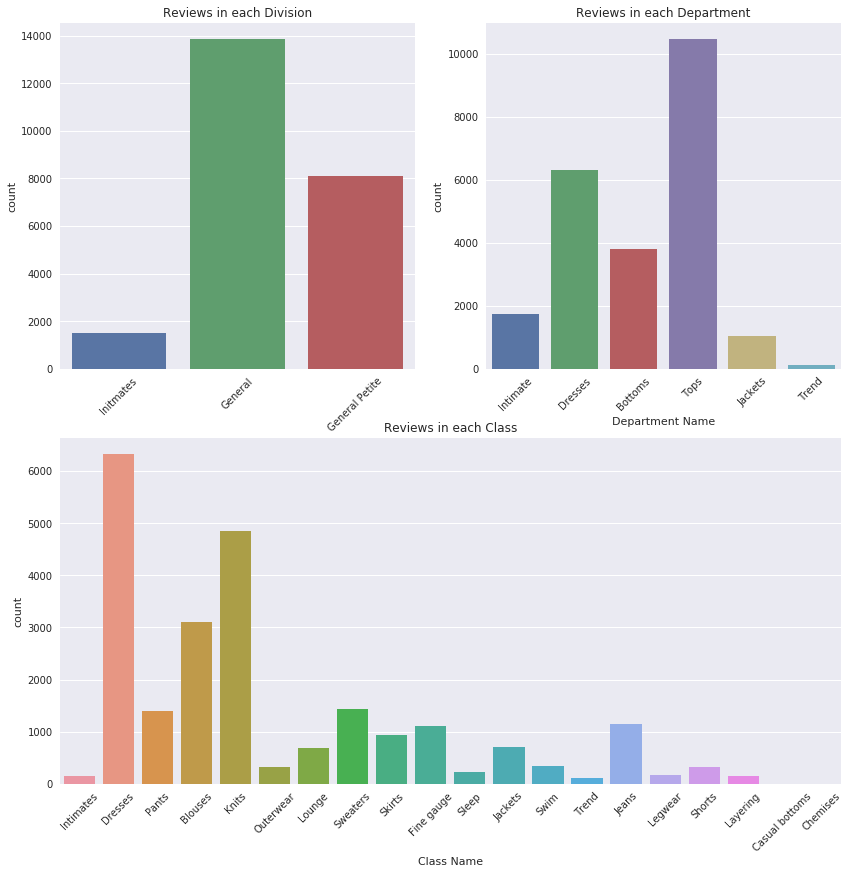

In [12]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(data['Division Name'])
ax1 = plt.title("Reviews in each Division")


ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(data['Department Name'])
ax2 = plt.title("Reviews in each Department")


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(data['Class Name'])
ax3 = plt.title("Reviews in each Class")


And now, let's check the rate of recommendations.

In [13]:
recommended = data[data['Recommended IND']==1]
not_recommended = data[data['Recommended IND']==0]

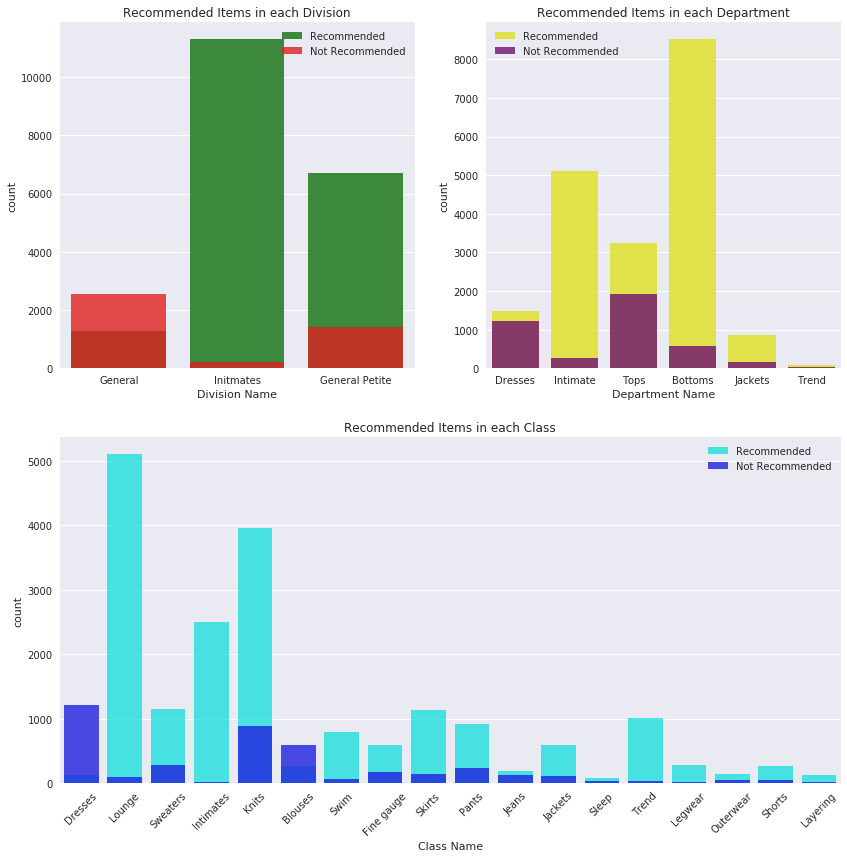

In [14]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division Name'], color = "green", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division Name'], color = "red", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Department Name'], color="yellow", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Department Name'], color="purple", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="cyan", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="blue", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

OMG! Dresses deparment need urgent care

What's the most popular item?

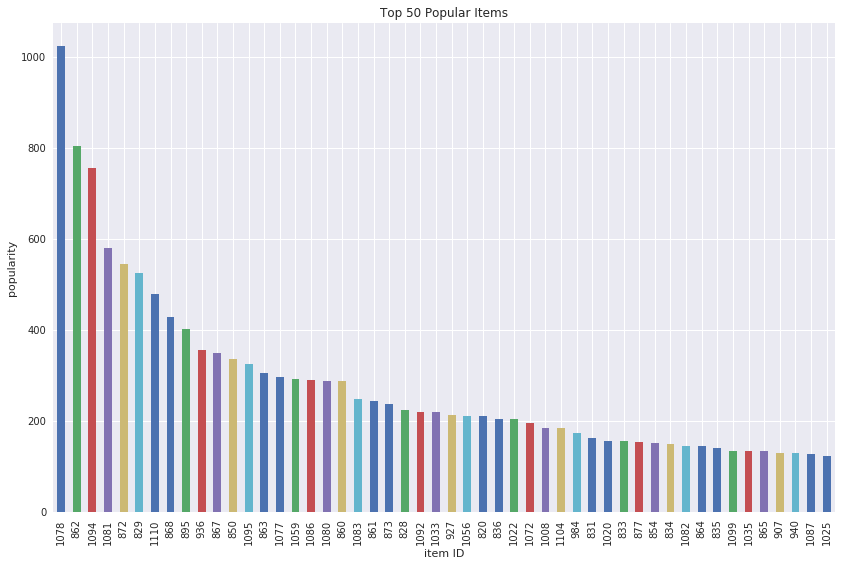

In [15]:
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
data['Clothing ID'].value_counts()[:50].plot(kind='bar');


This plot might be higly valuable for the corporate buyers 

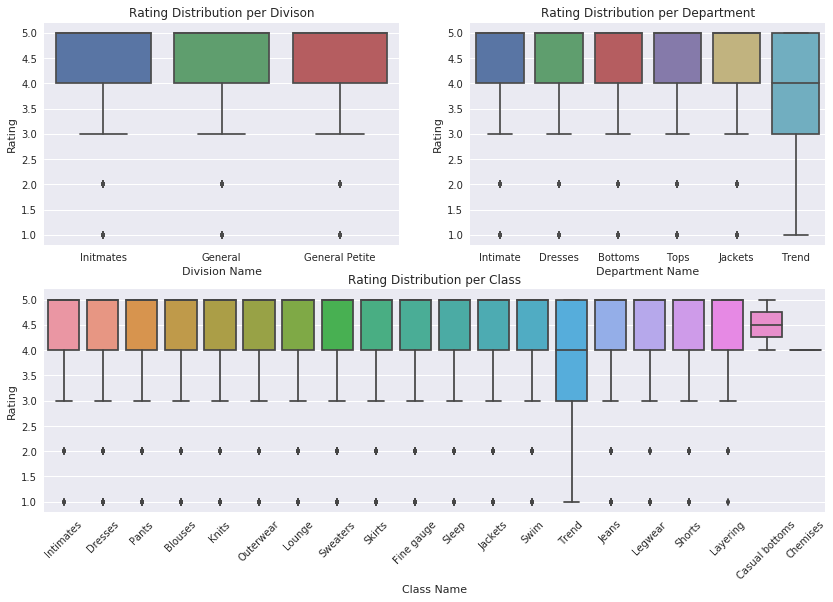

In [16]:
fig = plt.figure(figsize=(14, 9))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.boxplot(x="Division Name", y="Rating", data=data)
ax1 = plt.title('Rating Distribution per Divison')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.boxplot(x="Department Name", y="Rating", data=data)
ax2 = plt.title('Rating Distribution per Department')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x="Class Name", y="Rating", data=data)
ax3 = plt.title('Rating Distribution per Class')

I can't understand why the Dress department has so many negative recommendations but high ratings.
I'll come back to this point later

# Natural Language Processing

In this part, I'll try;
- Word tokenization with NLTK
- Word tokenization with Regex 
- Text preprocessing
- Gensim
- NER (Named Entity Recognition)
- SpaCy
- Supervised ML with NLP

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
from gensim.models.tfidfmodel import TfidfModel
import spacy
import itertools
import re

In [18]:
data[["Title","Review Text", "Rating"]].head()

,Title,Review Text,Rating
0,NaN,Absolutely wonderful - silky and sexy and comf...,4
1,NaN,Love this dress! it's sooo pretty. i happene...,5
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5


Mergin all reviews into one single variable (reviews)

In [19]:
reviews = data["Review Text"].str.lower().str.cat(sep=' ')

**Tokenization** with nltk and regex

In [20]:
# Use word_tokenize to tokenize the reviews
words_w = word_tokenize(reviews)

# Use regexp to tokenize the reviews
words_regexp = regexp_tokenize(reviews, r'\w+')

## Text Preprocessing

In this part, I'll create bag of words using both NLTK and regex tokenizations just to check if there'll be any difference between the results.

- With **NLTK**

In [21]:
# Retain alphabetic words
alpha_only = [t for t in words_w if t.isalpha()]

In [22]:
# Remove all stop words
english_stops = set(stopwords.words('english'))
no_stops = [t for t in alpha_only if t not in english_stops]

In [23]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [24]:
# Lemmatize all tokens into a new list
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [25]:
# Create the bag-of-words
bow = Counter(lemmatized)

In [26]:
# Print the 10 most common tokens
print(bow.most_common(10))

[('dress', 11337), ('fit', 10121), ('size', 9360), ('love', 8979), ('top', 8273), ('like', 7032), ('color', 6908), ('look', 6885), ('wear', 6519), ('great', 6094)]


- With **regex**

In [27]:
# Retain alphabetic words
alpha_only = [t for t in words_regexp if t.isalpha()]

In [28]:
# Remove all stop words
no_stops = [t for t in alpha_only if t not in english_stops]

In [29]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [30]:
# Lemmatize all tokens into a new list
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [31]:
# Create the bag-of-words
bow = Counter(lemmatized)

In [32]:
# Print the 10 most common tokens
print(bow.most_common(10))

[('dress', 11438), ('fit', 10180), ('size', 9439), ('love', 9004), ('top', 8370), ('like', 7175), ('color', 6987), ('look', 6914), ('wear', 6537), ('great', 6117)]


**NLTK** and **Regex** tokenizations providing the **same sequence** but **regex** tokenization has **higher** frequencies 

From this point on, I'll use words with regex tokenization.

# GENSIM

Now I'll try to create the same bag of words using GENSIM

In [33]:
# Create a Dictionary from the articles
dictionary = Dictionary([lemmatized])

In [34]:
# Create a MmCorpus
corpus = [dictionary.doc2bow(lemmatized)]

In [35]:
# Sort the reviews for frequency
bow_doc = sorted(corpus, key=lambda w: w[1], reverse=True)

In [36]:
# Print the top 10 words of the reviews alongside the count
for word_id, word_count in bow_doc[0][:10]:
    print(dictionary.get(word_id), word_count)

aa 3
aaaaaaamazing 1
aaaaandidon 1
aaaaannnnnnd 1
aaaahmazing 1
aaaahs 1
aaahed 1
aame 1
ab 4
abbey 2


In [37]:
# Create the defaultdict:
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [38]:
# Create a sorted list from the defaultdict
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

In [39]:
# Print the top 10 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:10]:
    print(dictionary.get(word_id), word_count)


dress 11438
fit 10180
size 9439
love 9004
top 8370
like 7175
color 6987
look 6914
wear 6537
great 6117


## NER (Named Entity Recognition)

In [40]:
tagged_text = nltk.pos_tag(lemmatized)

In [41]:
tagged_text[:5]

[('absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'JJ'),
 ('sexy', 'NN'),
 ('comfortable', 'JJ')]

In [42]:
chunked_sentences = nltk.ne_chunk(tagged_text)

In [43]:
chunked_sentences[0]

('absolutely', 'RB')

# SpaCy

In [44]:
nlp = spacy.load('en')

In [45]:
nlp.entity

In [46]:
nlp.max_length = 200000

In [47]:
len(lemmatized)

635798

In [48]:
# due to memory problem I used part of the corpus
doc = nlp(str(lemmatized[:20000]))

In [49]:
for ent in doc.ents:
    print(ent.label_, ent.text)

DATE christmas
CARDINAL three
ORDINAL second
DATE month
ORDINAL second
DATE winter
ORDINAL second
DATE today
DATE summer
CARDINAL two
DATE summer
CARDINAL zero
DATE summer
DATE september
DATE september
CARDINAL two
DATE today
ORDINAL first
DATE summer
DATE summer
DATE winter
DATE winter
DATE week
CARDINAL two
DATE summer
DATE summer
TIME hour
DATE summer
DATE summer
DATE winter
TIME hour
CARDINAL zero
DATE summer
ORDINAL fifth
DATE winter
DATE summer
DATE summer
CARDINAL six
DATE winter
DATE summer
TIME evening
ORDINAL second
CARDINAL three
DATE week
DATE month
DATE winter
DATE today
ORDINAL third
DATE month
ORDINAL first
DATE day
TIME night
CARDINAL two
DATE summer
DATE summer
DATE summer
DATE summer
DATE today
ORDINAL second
DATE summer
CARDINAL two
DATE summer
TIME evening
CARDINAL zero
ORDINAL first
ORDINAL first
DATE month
DATE winter
DATE summer
CARDINAL half
DATE year'
DATE summer
DATE weekend
DATE day
TIME evening
DATE july
DATE weekend
ORDINAL first
DATE year
DATE summer
CARDI

# Supervised ML with NLP

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [51]:
data = data.dropna()

In [52]:
y = data['Positively Rated']

In [53]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Review Text'], y, test_size = 0.33, random_state=53)

In [54]:
print('\n\nX_train shape: ', X_train.shape)



X_train shape:  (13173,)


In [55]:
# Initialize a CountVectorizer object
count_vectorizer = CountVectorizer (stop_words='english', ngram_range=(1,2), min_df=0.001, max_df=0.999)

# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


In [56]:
# Transform the training data 
count_train = count_vectorizer.fit_transform (X_train)
count_train = count_train.toarray()

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_train = tfidf_train.toarray()

In [57]:
# Transform the test data
count_test = count_vectorizer.transform (X_test)
count_test = count_test.toarray()

tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_test = tfidf_test.toarray()

In [58]:
print('Vocabulary len :', len(count_vectorizer.get_feature_names()))
print('Longest word   :', max(count_vectorizer.vocabulary_, key=len))

Vocabulary len : 4322
Longest word   : comfortable flattering


### Naive Bayes Classifier

In [59]:
# Instantiate a Multinomial Naive Bayes
nb_classifier = MultinomialNB()

In [60]:
#Use GridSearchCV to obtain best parameters
#didn't work-will do manually


In [61]:
alphas = np.arange(0,1,0.1)

In [62]:
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [63]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0


/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8252427184466019

Alpha:  0.1
Score:  0.8478964401294499

Alpha:  0.2
Score:  0.8409616273693944

Alpha:  0.30000000000000004
Score:  0.8327939590075513

Alpha:  0.4
Score:  0.8243180767452613

Alpha:  0.5
Score:  0.8161504083834181

Alpha:  0.6000000000000001
Score:  0.8109107720758206

Alpha:  0.7000000000000001
Score:  0.8064416705193405

Alpha:  0.8
Score:  0.8018184620126367

Alpha:  0.9
Score:  0.7965788257050394



In [64]:
# Fit the classifier to the training data
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [65]:
# Create the predicted tags
pred = nb_classifier.predict(tfidf_test)

In [66]:
# Calculate the accuracy score
metrics.accuracy_score(y_test, pred)

0.8478964401294499

In [67]:
print('AUC: ', roc_auc_score(y_test, pred))

AUC:  0.6921951716825707


In [68]:
# Calculate the confusion matrix
metrics.confusion_matrix(y_test, pred)

array([[ 598,  866],
       [ 121, 4904]])

In [69]:
# Fit the classifier to the training data
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(count_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [70]:
# Create the predicted tags
pred = nb_classifier.predict(count_test)

In [71]:
# Calculate the accuracy score
metrics.accuracy_score(y_test, pred)

0.8609955308984435

In [72]:
print('AUC: ', roc_auc_score(y_test, pred))

AUC:  0.8250550526058232


We obtained a better score with count vectorizer comparing tfidf 

In [73]:
# Calculate the confusion matrix
conf_mat = metrics.confusion_matrix(y_test, pred)

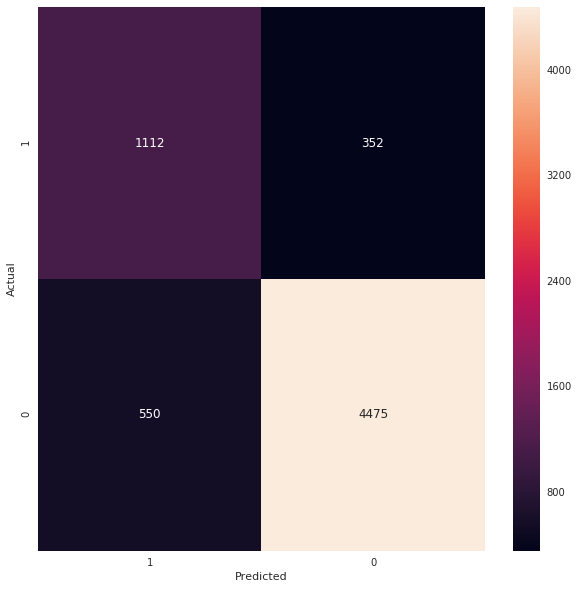

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['1','0'], yticklabels=['1','0'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [75]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_


In [76]:
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()


In [77]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))


In [78]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0 ),
]

In [79]:
CV = 5

In [80]:
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [81]:
entries = []
features = count_train
labels = y_train
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

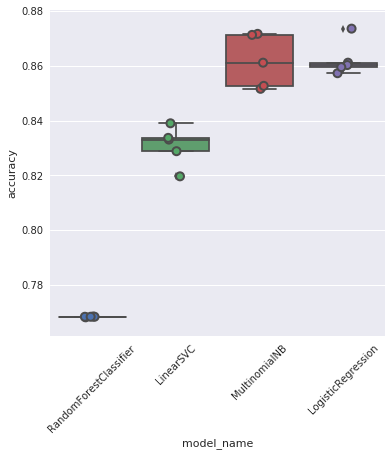

In [82]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45)
plt.show()

In [83]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.830866
LogisticRegression        0.862371
MultinomialNB             0.861688
RandomForestClassifier    0.768390
Name: accuracy, dtype: float64

In [ ]:
from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(max_time_mins=300,
                                    generations=50, 
                                    population_size=50, cv=5,
                                    random_state=5, 
                                    verbosity=2, 
                                    n_jobs = -1)
tpot_classifier.fit(count_train, y_train)
print(tpot_classifier.score(count_test, y_test))
tpot_classifier.export('tpot_Womenecommerce.py')

TPOT provided best score with Logistic Regression as well. I'll update metrics and check the test scores.

In [85]:
logreg_CV = LogisticRegression(C=5.0,random_state=5, dual=True, penalty="l2")
logreg_CV.fit(count_train, y_train)
y_pred_lr_CV = logreg_CV.predict(count_test)
print(metrics.classification_report(y_test, y_pred_lr_CV))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_lr_CV))

             precision    recall  f1-score   support

          0       0.66      0.65      0.65      1464
          1       0.90      0.90      0.90      5025

avg / total       0.84      0.85      0.85      6489

Accuracy :  0.8458930497765449


In [86]:
multiNB = MultinomialNB()
multiNB.fit(count_train, y_train)
y_pred_NB = multiNB.predict(count_test)
print(metrics.classification_report(y_test, y_pred_NB))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_NB))


             precision    recall  f1-score   support

          0       0.66      0.77      0.71      1464
          1       0.93      0.88      0.91      5025

avg / total       0.87      0.86      0.86      6489

Accuracy :  0.8596085683464324


In [87]:
linear_SVC = LinearSVC()
linear_SVC.fit(count_train, y_train)
y_pred_linSVC = linear_SVC.predict(count_test)
print(metrics.classification_report(y_test, y_pred_linSVC))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_linSVC))


             precision    recall  f1-score   support

          0       0.63      0.64      0.63      1464
          1       0.90      0.89      0.89      5025

avg / total       0.83      0.83      0.83      6489

Accuracy :  0.8329480659577747


In [88]:
RF_CLF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
RF_CLF.fit(count_train, y_train)
y_pred_RF = RF_CLF.predict(count_test)
print(metrics.classification_report(y_test, y_pred_RF))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred_RF))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1464
          1       0.77      1.00      0.87      5025

avg / total       0.60      0.77      0.68      6489

Accuracy :  0.7743874248728617


/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Accuracy scores of ML models:

<TABLE>
<TR> <TH style="text-align:center;"> Model Name <TH style="text-align:center;"> Train <TH style="text-align:center;"> Test
<TR> <TD style="text-align:center;"> LinearSVC <TD style="text-align:center;"> 0.830866  <TD style="text-align:center;"> 0.832948
<TR> <TD style="text-align:center;"> Naive Bayes <TD style="text-align:center;"> 0.861688  <TD style="text-align:center;"> 0.859608
<TR> <TD style="text-align:center;"> Logistic Regression <TD style="text-align:center;"> 0.862371  <TD style="text-align:center;"> 0.845893
<TR> <TD style="text-align:center;"> Random Forest <TD style="text-align:center;"> 0.768390  <TD style="text-align:center;"> 0.774387

</TABLE>

## RNN
I will use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras. 

### Pad sequences

In order to feed this data into our RNN, all input documents must have the same length. I will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. For now, set max_words to 500.

In [89]:
from keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(count_train, maxlen=max_words)
X_test = sequence.pad_sequences(count_test, maxlen=max_words)

/home/muzo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**TODO: Design an RNN model for sentiment analysis**

Build our model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that our input is a sequence of words (technically, integer word IDs) of maximum length = max_words, and our output is a binary sentiment label (0 or 1).

In [90]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

vocabulary_size = 5000
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None



To summarize, our model is a simple RNN model with 1 embedding, 1 LSTM and 1 dense layers. 213,301 parameters in total need to be trained.

**Train and evaluate**

We first need to compile our model by specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics we'd like to measure. Specify the approprate parameters, including at least one metric 'accuracy'.

In [91]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

Once compiled, we can kick off the training process. There are two important training parameters that we have to specify - batch size and number of training epochs, which together with our model architecture determine the total training time.

In [92]:
batch_size = 64
num_epochs = 3

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Train on 13109 samples, validate on 64 samples
Epoch 1/3
13109/13109 [==============================] - 160s 12ms/step - loss: 0.5498 - acc: 0.7679 - val_loss: 0.4296 - val_acc: 0.8594
Epoch 2/3
13109/13109 [==============================] - 174s 13ms/step - loss: 0.5428 - acc: 0.7679 - val_loss: 0.4340 - val_acc: 0.8594
Epoch 3/3
13109/13109 [==============================] - 162s 12ms/step - loss: 0.5430 - acc: 0.7679 - val_loss: 0.4430 - val_acc: 0.8594


In [93]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.7743874249004182
